# Working with time series, frequency series, and unit conversion

In this notebook, we show some of the most useful features of the [timeseries](../series.rst) module. To do so, we will analyze a fake gravitational-wave signal. We will also show the [frequencyseries](../series.rst) module and the [unitconv](../unitconv.rst) modules.

First, let's generate this signal. 

(This notebook is meant to be converted in Sphinx documentation and not used directly.)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from kuibit import timeseries as ts
from kuibit import series
from kuibit import unitconv as uc
from kuibit.gw_utils import luminosity_distance_to_redshift

%matplotlib inline

In [2]:
t = np.linspace(0, 20, 5000)
y = np.sin(t)

# Generate a TimeSeries by providing the times and the values of the series
gw = ts.TimeSeries(t, y)

To access the times and the values, use ``gw.t`` and ``gw.y``. You can also iterate over the series with a for loop yielding the elements `(t, y)` at each iteration of the loop. For example.

In [3]:
for tt, yy in gw:
    print(tt, yy)

0.0 0.0
0.004000800160032006 0.004000789486971321
0.008001600320064013 0.008001514935783532
0.012002400480096018 0.012002112309302542
0.016003200640128026 0.016002517572444287
0.020004000800160033 0.020002666693199687
0.024004800960192037 0.024002495643659576
0.028005601120224044 0.028001940401039562
0.03200640128025605 0.03200093694870479
0.03600720144028806 0.03599942127719461
0.040008001600320066 0.03999732938524717
0.04400880176035207 0.0439945972808238
0.048009601920384073 0.04799116098213332
0.05201040208041608 0.05198695651865616
0.05601120224044809 0.055981919932168285
0.060012002400480095 0.059975987277764924
0.0640128025605121 0.06396909462488413
0.0680136027205441 0.06796117805833003
0.07201440288057612 0.07195217367929596
0.07601520304060812 0.07594201760638712
0.08001600320064013 0.07993064597664322
0.08401680336067213 0.08391799494656059
0.08801760352070415 0.08790400069311417
0.09201840368073615 0.09188859941477902
0.09601920384076815 0.09587172733255157
0.10002000400080

2.8405681136227248 0.29649883180408443
2.844568913782757 0.2926755720191694
2.8485697139427884 0.28884762755766547
2.8525705141028204 0.2850150596911077
2.8565713142628524 0.28117792976503625
2.8605721144228844 0.27733629919801306
2.8645729145829164 0.273490229480639
2.8685737147429484 0.2696397821745697
2.8725745149029804 0.26578501891153006
2.8765753150630125 0.2619260013923279
2.8805761152230445 0.25806279138586624
2.8845769153830765 0.25419545072815464
2.8885777155431085 0.2503240413213195
2.8925785157031405 0.24644862513261315
2.8965793158631725 0.24256926419342192
2.9005801160232045 0.23868602059827343
2.9045809161832365 0.23479895650384244
2.9085817163432686 0.23090813412795622
2.9125825165033006 0.22701361574859838
2.9165833166633326 0.2231154637029123
2.9205841168233646 0.2192137403862031
2.9245849169833966 0.21530850825093906
2.9285857171434286 0.21139982980575198
2.9325865173034606 0.20748776761443657
2.9365873174634927 0.20357238429494912
2.9405881176235247 0.19965374251840


5.333066613322664 -0.8134845412688135
5.337067413482696 -0.8111512254904688
5.341068213642728 -0.8088049261169091
5.34506901380276 -0.806445680703895
5.349069813962792 -0.8040735270144064
5.353070614122824 -0.801688503018038
5.357071414282856 -0.7992906468903916
5.361072214442888 -0.7968799970124649
5.36507301460292 -0.7944565919700375
5.369073814762952 -0.7920204705530525
5.373074614922984 -0.7895716717549964
5.3770754150830165 -0.7871102347722749
5.3810762152430485 -0.7846361990035849
5.3850770154030805 -0.7821496040492847
5.3890778155631125 -0.7796504897107593
5.3930786157231445 -0.7771388959897839
5.3970794158831765 -0.7746148630878834
5.4010802160432085 -0.7720784314056891
5.4050810162032406 -0.7695296415422918
5.409081816363273 -0.7669685342945918
5.413082616523305 -0.7643951506566468
5.417083416683337 -0.7618095318190142
5.421084216843369 -0.7592117191680935
5.425085017003401 -0.7566017542854625
5.429085817163433 -0.7539796789472124
5.433086617323465 -0.751345535123279
5.437087


7.793558711742349 0.9981750905538148
7.797559511902381 0.9984086942919344
7.801560312062413 0.9986263171205285
7.805561112222445 0.9988279555562435
7.809561912382477 0.9990136063715778
7.813562712542509 0.9991832665949336
7.817563512702541 0.9993369335106652
7.821564312862573 0.9994746046591212
7.825565113022605 0.9995962778366849
7.829565913182637 0.9997019510958091
7.833566713342669 0.9997916227450473
7.837567513502701 0.999865291349081
7.841568313662733 0.9999229557287426
7.845569113822765 0.999964614961034
7.849569913982797 0.9999902683791416
7.853570714142829 0.9999999155724472
7.857571514302861 0.999993556386534
7.861572314462893 0.9999711909231896
7.865573114622925 0.9999328195404042
7.869573914782957 0.9998784428523647
7.873574714942989 0.999808061729445
7.877575515103021 0.9997216772981923
7.881576315263053 0.9996192909413084
7.885577115423085 0.9995009042976286
7.889577915583117 0.9993665192620944
7.893578715743149 0.9992161379857238
7.897579515903181 0.9990497628755769
7.90


10.354070814162833 -0.8011969842196064
10.358071614322865 -0.8035846472995813
10.362072414482897 -0.8059594478978713
10.36607321464293 -0.8083213480025142
10.370074014802961 -0.8106703098080379
10.374074814962993 -0.813006295716066
10.378075615123025 -0.8153292683359189
10.382076415283057 -0.8176391904852129
10.38607721544309 -0.8199360251904549
10.390078015603121 -0.8222197356876346
10.394078815763153 -0.8244902854228127
10.398079615923185 -0.8267476380527059
10.402080416083217 -0.828991757445269
10.40608121624325 -0.8312226076802729
10.410082016403281 -0.8334401530498797
10.414082816563313 -0.8356443580592146
10.418083616723345 -0.837835187426933
10.422084416883378 -0.8400126060857863
10.42608521704341 -0.8421765791831831
10.430086017203442 -0.8443270720817462
10.434086817363474 -0.8464640503598678
10.438087617523506 -0.8485874798122605
10.442088417683538 -0.8506973264505043
10.44608921784357 -0.8527935565035909
10.450090018003602 -0.8548761364184644
10.454090818163634 -0.8569450328

0.3933049627486398
12.974594918983797 0.39698017321031487
12.97859571914383 0.40064902945625874
12.982596519303861 0.40431147276136215
12.986597319463893 0.40796744450316363
12.990598119623925 0.4116168861627882
12.994598919783957 0.4152597393258837
12.99859971994399 0.4188959456835562
13.002600520104021 0.42252544703330275
13.006601320264053 0.4261481852799435
13.010602120424085 0.42976410243655144
13.014602920584117 0.4333731406253804
13.01860372074415 0.4369752420787917
13.022604520904181 0.4405703491401785
13.026605321064213 0.44415840426488906
13.030606121224245 0.44773935002114756
13.034606921384277 0.4513131290909734
13.03860772154431 0.4548796842710987
13.042608521704341 0.45843895847388394
13.046609321864373 0.4619908947282317
13.050610122024406 0.46553543618049853
13.054610922184438 0.46907252609540495
13.05861172234447 0.47260210785694373
13.062612522504502 0.47612412496928586
13.066613322664534 0.4796385210576852
13.070614122824566 0.48314523986938035
13.074614922984598 0.4

0.0887226291964345
15.623124624924985 0.08473690727309814
15.627125425085017 0.08074982901857562
15.63112622524505 0.07676145825155886
15.635127025405081 0.07277185881142821
15.639127825565113 0.06878109455723064
15.643128625725145 0.06478922936665754
15.647129425885177 0.06079632713502236
15.65113022604521 0.05680245177423779
15.655131026205241 0.05280766721179281
15.659131826365273 0.04881203738972941
15.663132626525305 0.04481562626361916
15.667133426685337 0.040818497801539434
15.67113422684537 0.036820715983049604
15.675135027005402 0.03282234479816688
15.679135827165434 0.02882344824634212
15.683136627325466 0.024824090335435377
15.687137427485498 0.020824335080691425
15.69113822764553 0.01682424650371505
15.695139027805562 0.01282388863144633
15.699139827965594 0.008823325495135786
15.703140628125626 0.0048226211293194736
15.707141428285658 0.0008218395707940203
15.71114222844569 -0.003178955142408371
15.715143028605722 -0.007179698972044938
15.719143828765754 -0.011180327880687

 -0.5662148593045198
18.251650330066013 -0.5629126462941353
18.255651130226045 -0.5596014230897065
18.259651930386077 -0.5562812426919322
18.26365273054611 -0.5529521582448833
18.26765353070614 -0.5496142230351525
18.271654330866173 -0.5462674904910011
18.275655131026205 -0.5429120141815038
18.279655931186237 -0.5395478478156913
18.28365673134627 -0.536175045241691
18.2876575315063 -0.5327936604458644
18.291658331666333 -0.5294037475519433
18.295659131826365 -0.5260053608201636
18.299659931986398 -0.5225985546463967
18.30366073214643 -0.5191833835612788
18.30766153230646 -0.5157599022293379
18.311662332466494 -0.5123281654481191
18.315663132626526 -0.5088882281473074
18.319663932786558 -0.5054401453878482
18.32366473294659 -0.5019839723610666
18.32766553310662 -0.4985197643877833
18.331666333266654 -0.49504757691742945
18.335667133426686 -0.4915674655271592
18.339667933586718 -0.4880794859209598
18.34366873374675 -0.4845836939287603
18.34766953390678 -0.4810801455055376
18.351670334066

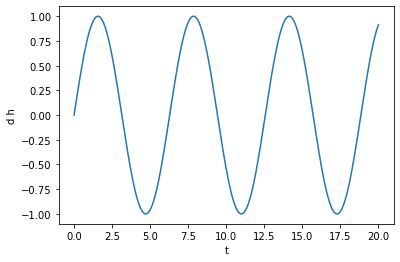

In [4]:
def plot(ser, lab1="d h", lab2="t", *args, **kwargs):
    """Plot Series ser with labels"""
    plt.ylabel(lab1)
    plt.xlabel(lab2)
    plt.plot(ser, *args, **kwargs)
    
plot(gw)

Let's make this more interesting: we square the signal and add Gaussian noise. [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) support directly using all the basic mathematical operations in Python and NumPy, so we can easily square the signal and add another TimeSeries to it.

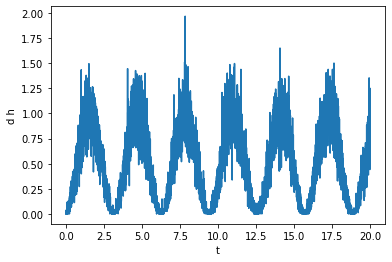

In [5]:
noise = np.random.normal(0, 0.1, len(gw))  # Here we used len() on the TimeSeries
noise_ts = ts.TimeSeries(t, noise)

gw += noise_ts
gw **= 2

plot(gw)

To analyze this signal, first we will smooth it. To do that, we will use the [savgol_smooth_time](../timeseries_ref.html#kuibit.timeseries.TimeSeries.savgol_smooth_time) method, which is a generalized "running average" filter. This method requires length of time over which we want to smooth the data.

In [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) there are always two different methods to do the same task, one with imperative verb (e.g., smooth), and the other with the past tense (e.g., smoothed). The first modifies the data, the second returns a new `TimeSeries` with the operation applied. Here, we will find what smoothing length to use by trial and error, so we will use the second method. 

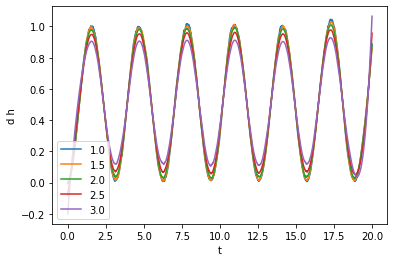

In [6]:
tsmooth = np.linspace(1, 3, 5)

for tsm in tsmooth:
    smoothed = gw.savgol_smoothed_time(tsm)
    plot(smoothed, label=tsm)
plt.legend()

From visual inspection it looks like that ``tsmooth = 1.5`` will work yield a clean series faithful to the original one.

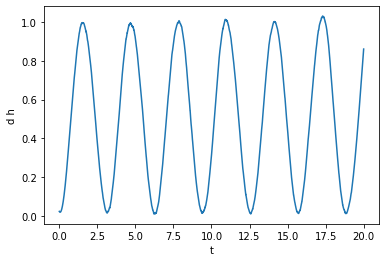

In [7]:
gw.savgol_smooth_time(1.5)
plot(gw)

Next, for fun, we can compute integrals and derivatives. For instance, we can compute what is the integral from 5 to 10.

The integral from 5 to 10 is 2.1938


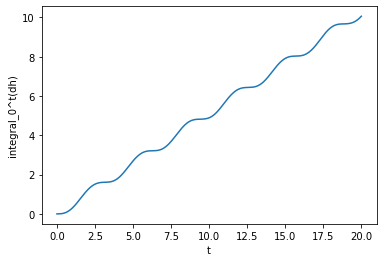

In [8]:
gw_int = gw.integrated()
a = 5
b = 10
print(f"The integral from {a} to {b} is {gw_int(b) - gw_int(a):.4f}")
plot(gw_int, lab1="integral_0^t(dh)")

Here, we showed a very powerful feature of `TimeSeries`: you can call them on a specific time (as we did we ``gw_int(b)``). This is done using splines to interpolate to the points that are not available. Splines can also be used to take derivatives. Alternatively, one can simply take the finite (central) difference. Let's see what's the derivative of ``gw`` using splines and finite difference.

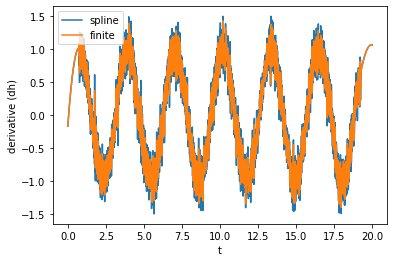

In [9]:
gw_spline_der = gw.spline_differentiated()
gw_numer_der = gw.differentiated()

plot(gw_spline_der, label='spline')
plot(gw_numer_der, lab1="derivative (dh)", label='finite')
plt.legend()

Clearly, derivatives will be noisier than the actual data, so often it is convenient to smooth them out as shown before.

TimeSeries support complex signals. Now, we will create one using `gw` itself. We will copy `gw`, time-shift it, find the common time interval with the original `gw`, and use that as a the imaginary part.

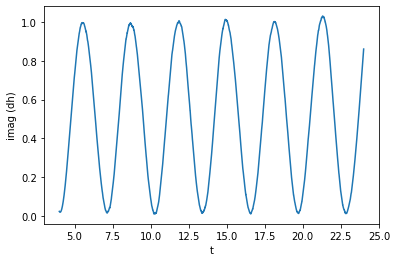

In [10]:
gw_imag = gw.copy()  # It is important to deep copy the object
gw_imag.time_shift(4)

plot(gw_imag, lab1 ="imag (dh)")

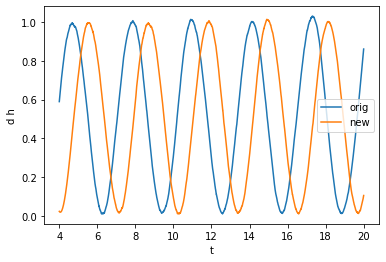

In [11]:
gw, gw_imag = series.sample_common([gw, gw_imag], resample=True)  # Resampling to common times

plot(gw, label="orig")
plot(gw_imag, label="new")
plt.legend()

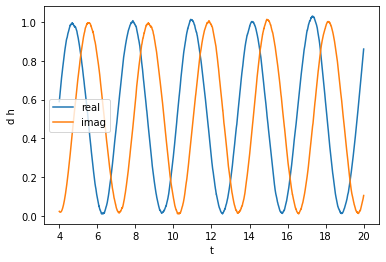

In [12]:
gw_complex = ts.TimeSeries(gw.t, gw.y + 1j * gw_imag.y)

plot(gw_complex.real(), label="real")
plot(gw_complex.imag(), label="imag")
plt.legend()

We can also compute the phase and absolute value. In particular, we will compute the unfolded phase (no wrapping over $2\pi$)

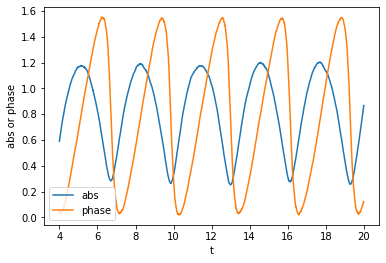

In [13]:
plot(gw_complex.abs(), label='abs')
plot(gw_complex.unfolded_phase(), lab1="abs or phase", label='phase')
plt.legend()

Here, the unfolded phase looks a little bit unusual. This is because we made up the signal.

We can also compute the frequency of the phase, which we can directly smooth.

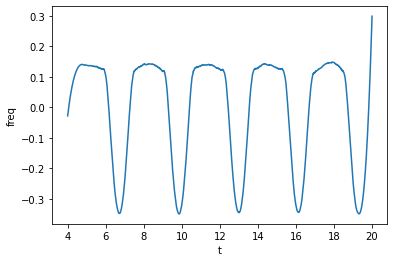

In [14]:
plot(gw_complex.phase_frequency(tsmooth=1.5), lab1="freq")

Next, we will take a Fourier transform. Before, let's pretend that the signal was in geometrized units (as in simulations), and let's make it physical assuming a scale of $M = 1 M_\odot$. For that, use the [unitconv](../unitconv.rst) module. We define a CU object that knows how to convert units.

In [15]:
CU = uc.geom_umass_msun(1) 

# How to convert from geometrized length to physical length?
# Simply multiply times CU.length. Let's check that it is 1.477 km
CU.length  # m

1476.6436994724972

Now we rescale `gw`, assuming that `y` is strain times distance (as usually is). Let's assume a distance of 500 Mpc.

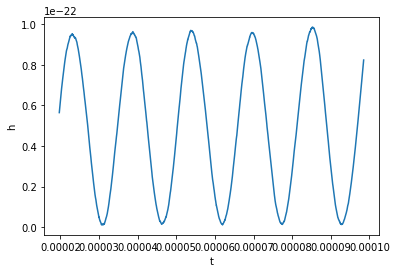

In [16]:
d_Mpc = 500

# inverse = True means from geometrized to physical
gw_physical = gw_complex.time_unit_changed(CU.time, inverse=True)  

gw_physical *= CU.length  # dh -> dh physical
# Now just the strain, since we assume a distance
gw_physical /= (d_Mpc * uc.MEGAPARSEC_SI)

# We have to manually add the redshift
gw_physical.redshifted(luminosity_distance_to_redshift(d_Mpc))

plot(gw_physical.real(), lab1="h")

Okay, now before taking the Fourier transform, we will remove the mean and window our signal. A Tukey window will work.

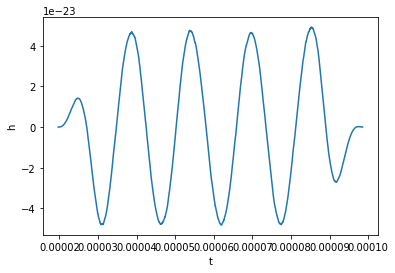

In [17]:
gw_physical.mean_remove()
gw_physical.tukey_window(0.3)
plot(gw_physical.real(), lab1="h")

Finally, we can take the Fourier transform. This is easy to do:

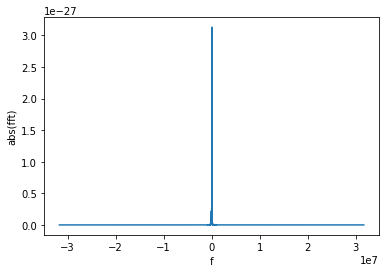

In [18]:
gw_fft = gw_physical.to_FrequencySeries()

# Plotting the amplitude of the Fourier transform
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

The new object is a `FrequencySeries`. It is very similar to a `TimeSeries` and it shares several properties, methods, and features. 

Let's restrict to only positive frequencies close to zero.

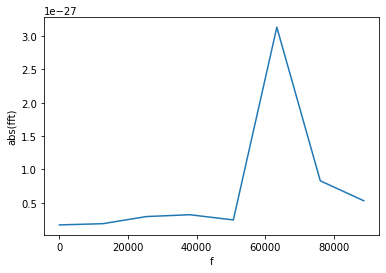

In [19]:
gw_fft.crop(0, 1e5)
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

We can find the frequency of that peak! For this, we find all the peaks with amplitude larger than 1e-27.

Frequency: 64148.61


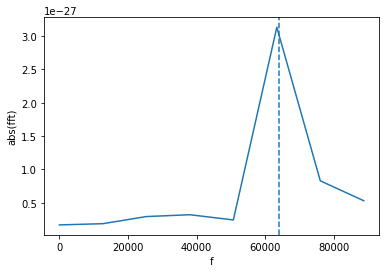

In [20]:
f_peak = gw_fft.peaks_frequencies(1e-27)[0]

print(f"Frequency: {f_peak:.2f}")
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")
plt.axvline(f_peak, ls = 'dashed')

The line is not on the maximum because we use a quadratic interpolation to find a more accurate location of the peak.

Sometimes, it is useful to ignore some data (or example, when we know that the data is invalid). `Series` objects support _masks_ to mark the points we want to ignore. Most functions work transparently with masks: for example, if you ask for the mean of a `Series`, the masked point will be ignored. Other functions do not support masks (most notably, splines). In that case, it is best to completely remove the masked points and work with clean data.

In [21]:
# Let's mask all the point in the spectrum with value larger than 1e-27

spectrum = gw_fft.abs()

print(f"Maximum without mask {spectrum.max():.3e}")

# Apply mask
spectrum.mask_greater(1e-27)

print(f"Maximum with mask {spectrum.max():.3e}")

print(f"Length with mask {len(spectrum)}")

# Remove points
spectrum.mask_remove()

print(f"Length after having removed the masked points {len(spectrum)}")

Maximum without mask 3.129e-27
Maximum with mask 8.304e-28
Length with mask 8
Length after having removed the masked points 7
